In [1]:
import os
import mmcv
import torch
import pandas as pd
import torch.nn as nn
import matplotlib.pyplot as plt

from mmdet.datasets import CocoDataset
from mmdet.apis import init_detector, inference_detector
from mmdet.core.evaluation import eval_map, eval_recalls

from visualization import DetectionVisualizer
from utils import convert_predictions
from utils.agent import get_model

%matplotlib inline

In [2]:
import warnings
warnings.simplefilter('ignore')

In [3]:
from datasets import ImageFolder
from inference import Inference

### Specify path to the data and mmdet
---

In [4]:
DATA_DIR = # PATH TO DATASET
MMDET_DIR = # PATH TO MMDET

In [5]:
train_dataset = ImageFolder(f"{DATA_DIR}/train2017")
val_dataset = ImageFolder(f"{DATA_DIR}/val2017")

### Load detectors and agent
---

In [6]:
wk_detector_cfg = f"{MMDET_DIR}/configs/regnet/mask_rcnn_regnetx-400MF_fpn_mstrain-poly_3x_coco.py"
sg_detector_cfg = f"{MMDET_DIR}/configs/regnet/mask_rcnn_regnetx-4GF_fpn_mstrain-poly_3x_coco.py"

wk_detector = init_detector(wk_detector_cfg, checkpoint='checkpoints/mask_rcnn_regnetx-400MF_fpn.pth', device='cuda')
sg_detector = init_detector(sg_detector_cfg, checkpoint='checkpoints/mask_rcnn_regnetx-4GF_fpn.pth', device='cuda')

path_to_agent_weights = # path to the weights
# load the agent
agent = get_model(1, _type='resnet18')
agent.load_state_dict(torch.load(path_to_agent_weights)) 
agent.eval();

Use load_from_local loader
Use load_from_local loader


### Prepare inferencing handle
---

In [7]:
inference = Inference(
    agent=agent,
    wk_detector=wk_detector,
    sg_detector=sg_detector,
    train_dataset=train_dataset,
    val_dataset=val_dataset
)
# load prediction visualizer
visualizer = DetectionVisualizer()

### Inference random image
---

In [8]:
def detect_on_random_image(dataset='train', conf_thr=0.7):
    raw_image, action, dt_results = inference.inference_random(dataset=dataset) # select train or val
    # convert predictions to bboxes
    bboxes, labels = convert_predictions(dt_results[0], conf_thr=conf_thr)
    print(f"Agent has chosen {'strong' if action else 'weak'} detector")
    visualizer.draw_patches_with_bboxes(raw_image, bboxes, labels, map_to_cond_id=False)

Agent has chosen strong detector


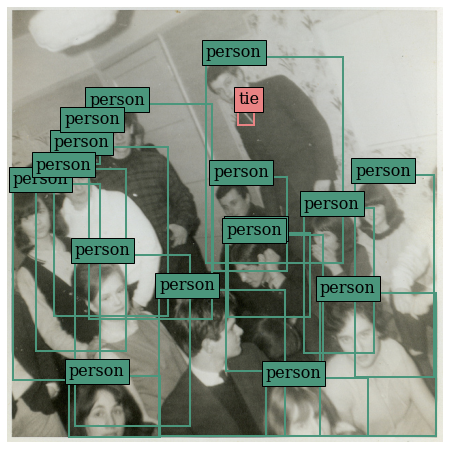

In [9]:
detect_on_random_image()

### Inference on uploaded image
---

In [10]:
def detect_on_uploaded_image(image_path: str, conf_thr=0.7):
    raw_image, action, dt_results = inference.inference_by_path(image_path) # select train or val
    # convert predictions to bboxes
    bboxes, labels = convert_predictions(dt_results[0], conf_thr=conf_thr)
    print(f"Agent has chosen {'strong' if action else 'weak'} detector")
    visualizer.draw_patches_with_bboxes(raw_image, bboxes, labels, map_to_cond_id=False)

Agent has chosen strong detector


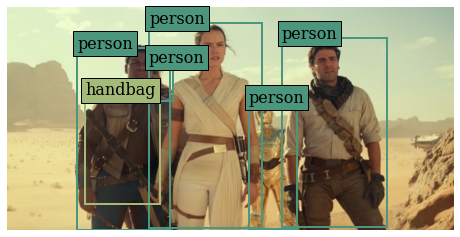

In [11]:
# upload your image 
detect_on_uploaded_image("images/star-wars.png")